## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi


Sat Apr 22 17:45:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.71       Driver Version: 456.71       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 650 Ti WDDM  | 00000000:07:00.0 N/A |                  N/A |
| 10%   30C    P8    N/A /  N/A |    868MiB /  1024MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [5]:
import os
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
"""
Your code here
"""
mms = MinMaxScaler(feature_range=(-1,1))
def preproc_x(x, flatten = True):
    if flatten:
        x = mms.fit_transform(x.reshape((len(x), -1)))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [10]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer4 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer5 (Dense)       (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330   

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

c:\Users\huang\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 10ms/step - loss: 1.7374 - accuracy: 0.3835 - val_loss: 1.5401 - val_accuracy: 0.4621
Epoch 2/100
196/196 [==============================] - 2s 10ms/step - loss: 1.4824 - accuracy: 0.4773 - val_loss: 1.4702 - val_accuracy: 0.4814
Epoch 3/100
196/196 [==============================] - 2s 10ms/step - loss: 1.3611 - accuracy: 0.5209 - val_loss: 1.4018 - val_accuracy: 0.5081
Epoch 4/100
196/196 [==============================] - 2s 10ms/step - loss: 1.2674 - accuracy: 0.5541 - val_loss: 1.4169 - val_accuracy: 0.5078
Epoch 5/100
196/196 [==============================] - 2s 10ms/step - loss: 1.1837 - accuracy: 0.5837 - val_loss: 1.3786 - val_accuracy: 0.5268
Epoch 6/100
196/196 [==============================] - 2s 10ms/step - loss: 1.1023 - accuracy: 0.6149 - val_loss: 1.3950 - val_accuracy: 0.5292
Epoch 7/100
196/196 [==============================] - 2s 10ms/step - loss: 1.0312 - accuracy: 0.6367 - val_loss: 1.4006 - val_accuracy:

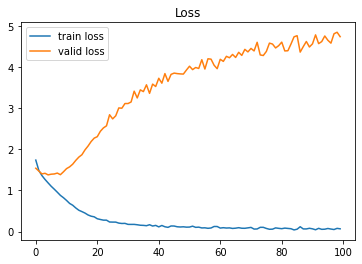

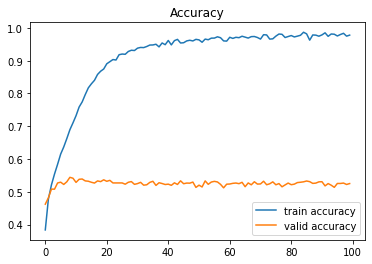

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()